In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']

data = pd.read_csv('../datasets/all.csv')


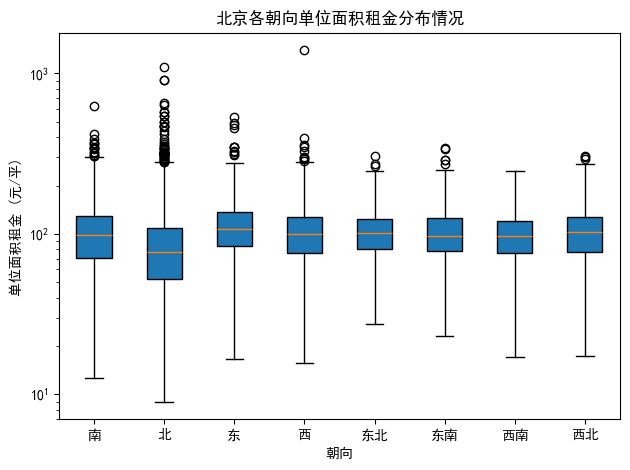

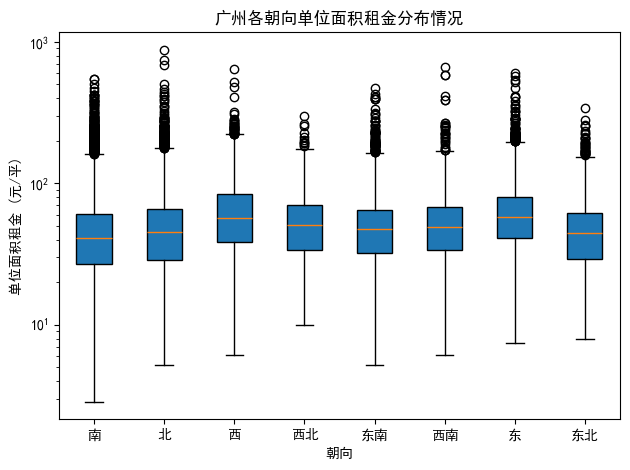

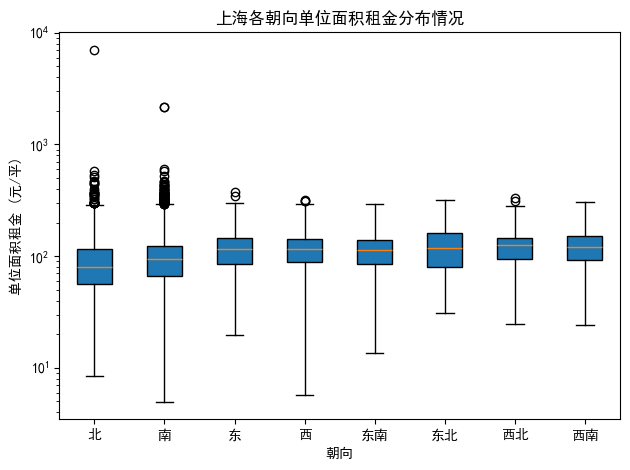

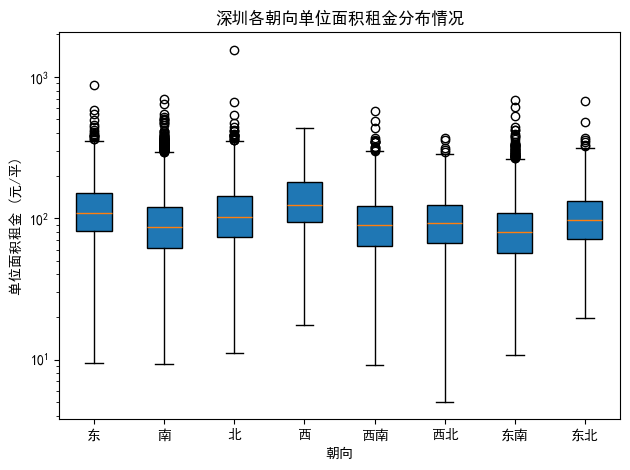

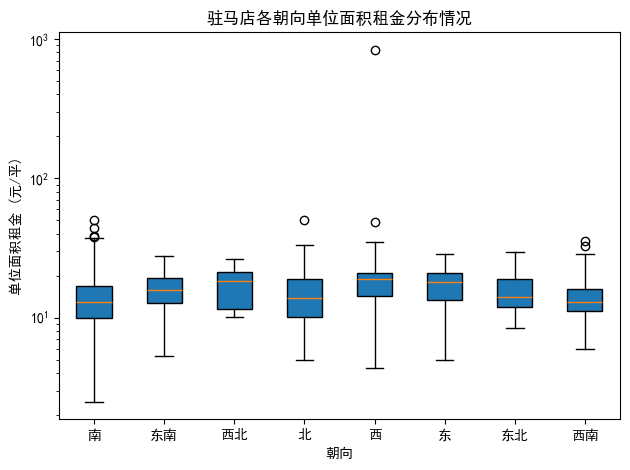

In [30]:
for city in data['city'].unique():
    city_data = data[data['city'] == city]
    orientations = city_data['orientation'].unique()
    orientations = [x for x in orientations if not pd.isnull(x)]

    # 创建一个空列表，用于存储每个朝向的单位面积租金数据
    orientation_prices = []

    # 遍历每个朝向
    for orientation in orientations:
        orientation_data = city_data[city_data['orientation'] == orientation]
        area_price = orientation_data['price'] / orientation_data['area']
        orientation_prices.append(area_price)

    # 绘制箱线图
    plt.figure()
    plt.boxplot(orientation_prices, patch_artist=True, whis=3)

    plt.title(f'{city}各朝向单位面积租金分布情况')
    plt.xlabel('朝向')
    plt.ylabel('单位面积租金 (元/平)')

    plt.xticks(range(1, len(orientations) + 1), orientations)
    plt.yscale('log')

    plt.tight_layout()
    plt.savefig(f'imgs/{city}各朝向单位面积租金分布情况.png')